train_test_split 알아보기 stratified (계층적)분할

# Load Data

In [3]:
from sklearn.datasets import load_iris

iris = load_iris()

X = iris.data
y = iris.target

print(y)

iris.feature_names

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

# 랜덤성 부여하지 않고 잘라낸 경우
안섞고 잘라보자

In [4]:
test_size= 50

X_test = X[ : test_size]
y_test = y[ : test_size]

print(y_test)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [5]:
X_train = X[test_size: ]
y_train = y[test_size: ]

print(y_train)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [6]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier()

dt_clf.fit(X_train, y_train) # 타깃에 1,2만 들어있음!

DecisionTreeClassifier()

In [7]:
from sklearn.metrics import accuracy_score

# 훈련세트 테스트세트에 대한 예측
train_pred = dt_clf.predict(X_train) # 훈련셋 가지고 예측
test_pred = dt_clf.predict(X_test) # 실전에서 예측

print("훈련 데이터 예측 정확도 : {:.3f}".format(accuracy_score(y_train, train_pred))) # 정답과 예측값 비교
print("테스트 데이터 예측 정확도 : {:.3f}".format(accuracy_score(y_test, test_pred))) # 정답과 예측값 비교

# 실전에선 하나두 못맞춤

훈련 데이터 예측 정확도 : 1.000
테스트 데이터 예측 정확도 : 0.000


# Train_test_split 활용하기

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, # 피쳐
    y, # 타겟
    test_size = 0.3,
    random_state=121
)

# 계층분할 stratified 안하고 자른거. 비율확인해보자

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

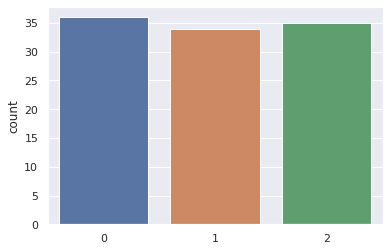

In [10]:
sns.countplot(x=y_train)
plt.show()

# 훈련용 셋이 1:1:1비율로 잘리지 않음

## stratify옵션 사용하자!

In [11]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size = 0.3,
    random_state=121,
    stratify=y  # 정수형 데이터만 들어가야함, y의 종류의 개수만큼 분할이 수행된다.
)

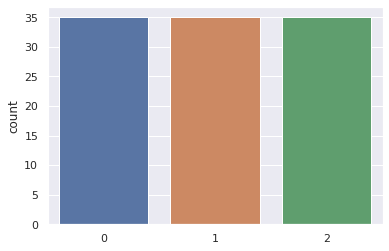

In [12]:
sns.countplot(x=y_train)
plt.show()

# 비율에 맞게 잘렸당!!

# K-Fold 와 Stratified K-Fold 알아보기

## K-Fold

In [13]:
from sklearn.model_selection import KFold
import numpy as np

In [14]:
# 3개의 폴드 세트로 분리하는 KFold 객체
kfold = KFold(n_splits=3)

# KFold 객체의 split() 호출하면 폴드별 학습용, 검증용 테스트의 ⭐인덱스⭐를 array로 반환

for train_indices, test_indices in kfold.split(X):
  print(len(train_indices), len(test_indices))

100 50
100 50
100 50


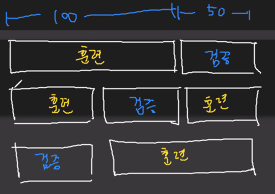

In [15]:
# 5개의 폴드 세트로 분리하는 KFold 객체
kfold = KFold(n_splits=5)

# KFold 객체의 split() 호출하면 폴드별 학습용, 검증용 테스트의 ⭐인덱스⭐를 array로 반환

for train_indices, test_indices in kfold.split(X):
  print(len(train_indices), len(test_indices))

120 30
120 30
120 30
120 30
120 30


In [16]:
# 3개의 폴드 세트로 분리하는 KFold 객체
kfold = KFold(n_splits=3)

# KFold 객체의 split() 호출하면 폴드별 학습용, 검증용 테스트의 ⭐인덱스⭐를 array로 반환

for train_indices, test_indices in kfold.split(X):
  print(len(train_indices), len(test_indices))

  print("검증 세트의 인덱스 : {}".format(test_indices))
  print()

100 50
검증 세트의 인덱스 : [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49]

100 50
검증 세트의 인덱스 : [50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73
 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97
 98 99]

100 50
검증 세트의 인덱스 : [100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117
 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135
 136 137 138 139 140 141 142 143 144 145 146 147 148 149]



# 교차검증 해보자

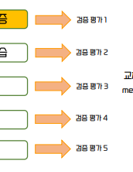

In [17]:
n_iter = 0
cv_accuracy = [] # 위의 평가의 결과들을 저장하기 위한 list


# KFold객체의 split( ) 호출하면 폴드 별 학습용, 검증용 테스트의 로우 인덱스를 array로 반환  
for train_index, test_index  in kfold.split(X): 
    # kfold.split( )으로 반환된 ⭐⭐인덱스⭐⭐를 이용하여 학습용, 검증용 테스트 데이터 추출
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    
    #학습 및 예측 
    dt_clf.fit(X_train , y_train)    
    pred = dt_clf.predict(X_test)
    n_iter += 1
    
    # 반복 시 마다 정확도 측정 
    accuracy = np.round(accuracy_score(y_test,pred), 4)
    train_size = X_train.shape[0]
    test_size = X_test.shape[0]
    print('\n#{0} 교차 검증 정확도 :{1}, 학습 데이터 크기: {2}, 검증 데이터 크기: {3}'.format(n_iter, accuracy, train_size, test_size))
    print('#{0} 검증 세트 인덱스:{1}'.format(n_iter,test_index))
    
    cv_accuracy.append(accuracy)
    
# 개별 iteration별 정확도를 합하여 평균 정확도 계산 
print('\n## 평균 검증 정확도:', np.mean(cv_accuracy))

# 안섞구 접어서 정확도0나옴


#1 교차 검증 정확도 :0.0, 학습 데이터 크기: 100, 검증 데이터 크기: 50
#1 검증 세트 인덱스:[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49]

#2 교차 검증 정확도 :0.0, 학습 데이터 크기: 100, 검증 데이터 크기: 50
#2 검증 세트 인덱스:[50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73
 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97
 98 99]

#3 교차 검증 정확도 :0.0, 학습 데이터 크기: 100, 검증 데이터 크기: 50
#3 검증 세트 인덱스:[100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117
 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135
 136 137 138 139 140 141 142 143 144 145 146 147 148 149]

## 평균 검증 정확도: 0.0


## stratified K Fold해보자!

In [18]:
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=3)

for train_indices, test_indices in skf.split(X,y): # 아까의 stratify=y느낌 y비율 기준으로 자름
  print("검증 세트의 인덱스 : {}".format(test_indices))
  print()

# y의 0,1,2, 비율에 따라 맞게 잘 뽑아졌다! 골고루

  class_, counts = np.unique(y[test_indices], return_counts=True)
  classes = dict(zip(class_, counts))
  print("클래스 0 : {}개 / 클래스 1 : {}개 / 클래스 2 : {}개".format(classes[0], classes[1], classes[2]))
  print("="*50)
  print()

검증 세트의 인덱스 : [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  50
  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66 100 101
 102 103 104 105 106 107 108 109 110 111 112 113 114 115]

클래스 0 : 17개 / 클래스 1 : 17개 / 클래스 2 : 16개

검증 세트의 인덱스 : [ 17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  67
  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82 116 117 118
 119 120 121 122 123 124 125 126 127 128 129 130 131 132]

클래스 0 : 17개 / 클래스 1 : 16개 / 클래스 2 : 17개

검증 세트의 인덱스 : [ 34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  83  84
  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 133 134 135
 136 137 138 139 140 141 142 143 144 145 146 147 148 149]

클래스 0 : 16개 / 클래스 1 : 17개 / 클래스 2 : 17개



In [38]:
classes # 인덱스 사용한거아님. classes["키이름"]인데 키이름이 0,1,2숫자라 인덱스쓴것처럼 보이는거!!

{0: 16, 1: 17, 2: 17}

# Stratified KFold의 교차검정!

In [19]:
dt_clf = DecisionTreeClassifier(random_state=156)

skfold = StratifiedKFold(n_splits=3)
n_iter=0
cv_accuracy=[]

# StratifiedKFold의 split( ) 호출시 반드시 레이블 데이터 셋도 추가 입력 필요  
for train_index, test_index  in skfold.split(X, y):
    # split( )으로 반환된 인덱스를 이용하여 학습용, 검증용 테스트 데이터 추출
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    #학습 및 예측 
    dt_clf.fit(X_train , y_train)    
    pred = dt_clf.predict(X_test)

    # 반복 시 마다 정확도 측정 
    n_iter += 1
    accuracy = np.round(accuracy_score(y_test,pred), 4)
    train_size = X_train.shape[0]
    test_size = X_test.shape[0]
    
    print('\n#{0} 교차 검증 정확도 :{1}, 학습 데이터 크기: {2}, 검증 데이터 크기: {3}'.format(n_iter, accuracy, train_size, test_size))
    print('#{0} 검증 세트 인덱스:{1}'.format(n_iter,test_index))
    cv_accuracy.append(accuracy)
    
# 교차 검증별 정확도 및 평균 정확도 계산 
print('\n## 교차 검증별 정확도:', np.round(cv_accuracy, 4))
print('## 평균 검증 정확도:', np.mean(cv_accuracy))


#1 교차 검증 정확도 :0.98, 학습 데이터 크기: 100, 검증 데이터 크기: 50
#1 검증 세트 인덱스:[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  50
  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66 100 101
 102 103 104 105 106 107 108 109 110 111 112 113 114 115]

#2 교차 검증 정확도 :0.94, 학습 데이터 크기: 100, 검증 데이터 크기: 50
#2 검증 세트 인덱스:[ 17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  67
  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82 116 117 118
 119 120 121 122 123 124 125 126 127 128 129 130 131 132]

#3 교차 검증 정확도 :0.98, 학습 데이터 크기: 100, 검증 데이터 크기: 50
#3 검증 세트 인덱스:[ 34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  83  84
  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 133 134 135
 136 137 138 139 140 141 142 143 144 145 146 147 148 149]

## 교차 검증별 정확도: [0.98 0.94 0.98]
## 평균 검증 정확도: 0.9666666666666667


# cross_val_score

In [20]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(
    DecisionTreeClassifier(), # Estimator 객체 . Classifier가 들어가면 자동으로 Stratified K Fold사용한다.
    X,
    y,
    scoring="accuracy",
    cv=3 # 폴드의 개수
)

# 교차 검증별 정확도 및 평균 정확도 계산 
print('\n## 교차 검증별 정확도:', np.round(scores, 4))
print('## 평균 검증 정확도:', np.mean(scores))



## 교차 검증별 정확도: [0.98 0.92 1.  ]
## 평균 검증 정확도: 0.9666666666666667


# GridSearchCV를 이용한 하이퍼 파라미터 튜닝과 교차검증

In [21]:
from sklearn.model_selection import GridSearchCV


In [22]:
X_train, X_test, y_train, y_test = train_test_split(
    iris.data,
    iris.target,
    test_size=0.2,
    random_state=121
)

dt_clf = DecisionTreeClassifier()

# Gridsearch를 수행할 하이퍼 파라미터를 딕셔너리로 설정

조합
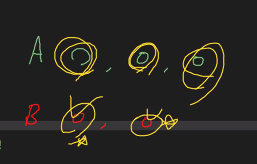
총 6번

In [23]:
# key값 : 하이퍼파라미터의 이름
# value : 하이퍼 파라미터에 들어갈 값의 목록[리스트]

parameters = {
    'max_depth':[1,2,3],
    "min_samples_split":[2,3]
}

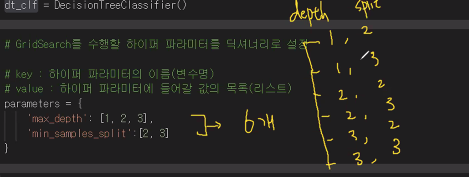
6개의 모델

In [24]:
# param_grid의 하이퍼 파라미터들을 3개의 train, valid fold로 나누어서 테스트 수행

grid_dt_clf = GridSearchCV(
    dt_clf,
    param_grid = parameters,
    cv=3, # Fold의 개수
    refit=True,
    return_train_score=True,
    n_jobs=-1 # 사용가능한 CPU를 모두 사용해서 훈련에 투입하겠다
)

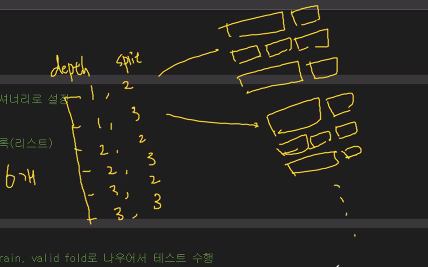
총 18개의 모델. 모델 하나당 검증 3개씩

In [25]:
grid_dt_clf.fit(X_train, y_train) # 18번

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3], 'min_samples_split': [2, 3]},
             return_train_score=True)

In [26]:
# 총 18개의 결과지만 cross validation의 결과는 3개씩 평균값을 사용했지.
# > 그래서 최종결과로 총6개나옴

# GridSearchCV의 결과는 cv_results_ 변수에 들어있다.
grid_dt_clf.cv_results_

{'mean_fit_time': array([0.00107964, 0.00077621, 0.00076842, 0.00324702, 0.00075078,
        0.0006694 ]),
 'std_fit_time': array([1.10183495e-04, 2.77170072e-05, 3.97813861e-05, 3.18429759e-03,
        9.72901672e-05, 7.00037261e-05]),
 'mean_score_time': array([0.00053191, 0.00047803, 0.00042001, 0.00048629, 0.0003678 ,
        0.00037718]),
 'std_score_time': array([3.78918061e-05, 4.77389175e-05, 8.68475106e-06, 4.49562169e-05,
        3.53601537e-05, 6.48939576e-05]),
 'param_max_depth': masked_array(data=[1, 1, 2, 2, 3, 3],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_min_samples_split': masked_array(data=[2, 3, 2, 3, 2, 3],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'max_depth': 1, 'min_samples_split': 2},
  {'max_depth': 1, 'min_samples_split': 3},
  {'max_depth': 2, 'min_samples_split': 2},
  {'max_depth': 2, 'min_sa

In [27]:
import pandas as pd

scores_df = pd.DataFrame(grid_dt_clf.cv_results_)
scores_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.001080,0.000110,0.000532,0.000038,1,2,"{'max_depth': 1, 'min_samples_split': 2}",0.700,0.7,0.70,0.700000,1.110223e-16,5,0.7000,0.7000,0.7000,0.700000,1.110223e-16
1,0.000776,0.000028,0.000478,0.000048,1,3,"{'max_depth': 1, 'min_samples_split': 3}",0.700,0.7,0.70,0.700000,1.110223e-16,5,0.7000,0.7000,0.7000,0.700000,1.110223e-16
2,0.000768,0.000040,0.000420,0.000009,2,2,"{'max_depth': 2, 'min_samples_split': 2}",0.925,1.0,0.95,0.958333,3.118048e-02,3,0.9750,0.9375,0.9625,0.958333,1.559024e-02
3,0.003247,0.003184,0.000486,0.000045,2,3,"{'max_depth': 2, 'min_samples_split': 3}",0.925,1.0,0.95,0.958333,3.118048e-02,3,0.9750,0.9375,0.9625,0.958333,1.559024e-02
4,0.000751,0.000097,0.000368,0.000035,3,2,"{'max_depth': 3, 'min_samples_split': 2}",0.975,1.0,0.95,0.975000,2.041241e-02,1,0.9875,0.9625,0.9875,0.979167,1.178511e-02
5,0.000669,0.000070,0.000377,0.000065,3,3,"{'max_depth': 3, 'min_samples_split': 3}",0.975,1.0,0.95,0.975000,2.041241e-02,1,0.9875,0.9625,0.9875,0.979167,1.178511e-02


In [28]:
# 최적의 결과 뽑기! Valid결과 3개평균낸값들 6개중 최고
print("GridSearchCV 최적 파라미터 : {}".format(grid_dt_clf.best_params_)) #하이퍼파라미터 3,2로 하는게 젤좋다
print("GridSearchCV 최고 정확도 : {:.4f}".format(grid_dt_clf.best_score_)) # valid/train 0.975나왔다.

GridSearchCV 최적 파라미터 : {'max_depth': 3, 'min_samples_split': 2}
GridSearchCV 최고 정확도 : 0.9750


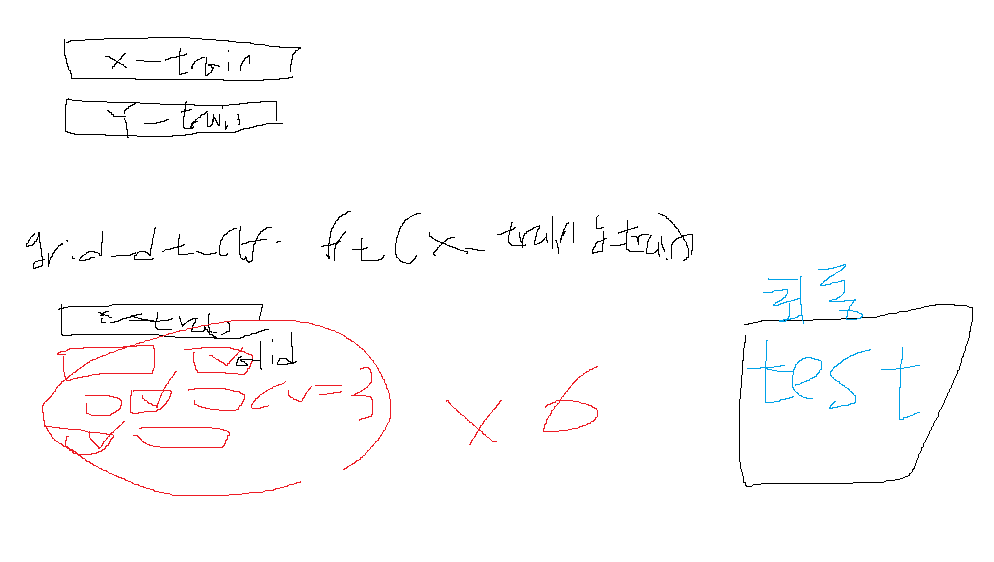

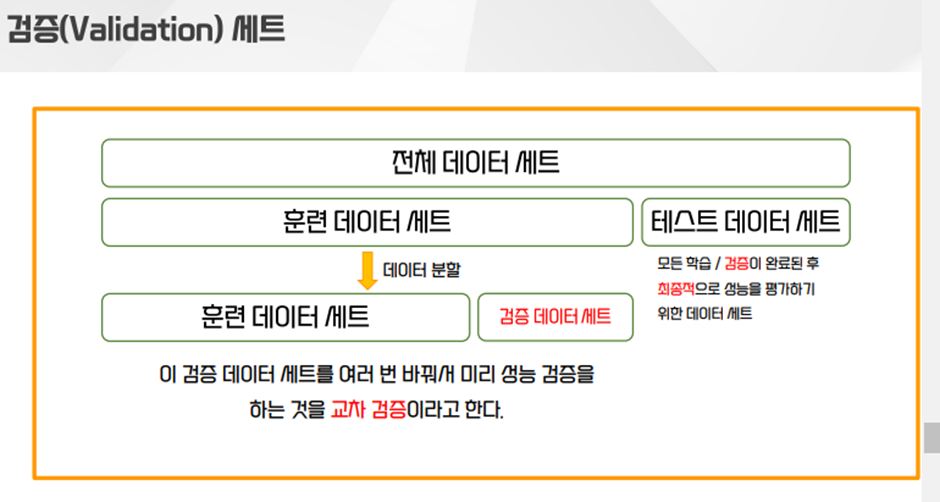

In [29]:
# 최고의 결과를 냈었던 Estimator로 최종 예측(⭐⭐⭐수능(X-test끝까지 아껴놨던거)보는느낌)(predict) TEST데이터에서 해보자!

pred = grid_dt_clf.predict(X_test) # 수능
print("테스트 세트의 정확도 : {:.4f}".format(accuracy_score(y_test,pred)))

테스트 세트의 정확도 : 0.9667


In [30]:
# GridSearchCV의 refit에 의해 이미 학습이 완료된 estimator 반환
# 위칸이랑 결과 똑같음
best_estimator = grid_dt_clf.best_estimator_

pred = best_estimator.predict(X_test)
print("테스트 세트의 정확도 : {:.4f}".format(accuracy_score(y_test,pred)))

테스트 세트의 정확도 : 0.9667
